In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [95]:
x=np.linspace(-1,1,1001)
d=np.exp(x)

In [108]:
A1=np.polynomial.chebyshev.chebvander(x,6)

In [69]:
u,s,v=np.linalg.svd(A1)

In [70]:
print("condition number is:", s.max()/s.min()) 

condition number is: 2.8172113877534866


In [112]:
A2=np.polynomial.chebyshev.chebvander(x,70)

In [97]:
u,s,v=np.linalg.svd(A2)

In [98]:
print("condition number is:", s.max()/s.min()) 

condition number is: 5.2093144924998915


STAYS STABLE WITH HIGHER ORDER

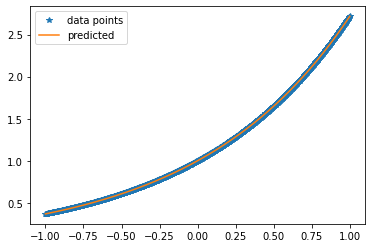

In [131]:
#first fit with order 7
u,s,v=np.linalg.svd(A1)
S=np.eye(s.shape[0])*s
U=u[:,:s.shape[0]].copy()
V=v.copy()
Sinv=np.linalg.inv(S)
pinv=V.T@Sinv@U.T
m=pinv@d.reshape(d.shape[0],1) # coefficients
pred=np.polynomial.chebyshev.chebval(x,m).flatten() # predicted values
plt.plot(x,d,'*',label='data points')
plt.plot(x,pred,label='predicted')
plt.legend()

In [110]:
err1= d-pred
rms1= np.sqrt(np.mean(err1**2))
print(f" With cheb order 6: max error is {err1.max()}, and rms is {rms1}")

 With cheb order 6: max error is 7.984979884856358e-06, and rms is 1.9852832482769786e-06


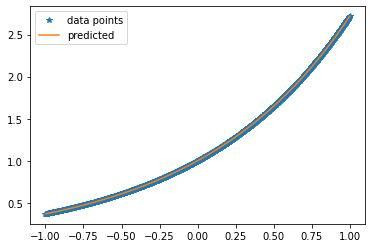

In [118]:
#first fit with order 70
u,s,v=np.linalg.svd(A2)
S=np.eye(s.shape[0])*s
U=u[:,:s.shape[0]].copy()
V=v.copy()
Sinv=np.linalg.inv(S)
pinv=V.T@Sinv@U.T
m=pinv@d.reshape(d.shape[0],1) # coefficients

# predict based only on truncated values
pred=np.polynomial.chebyshev.chebval(x,m[:7]).flatten() # predicted values
plt.plot(x,d,'*',label='data points')
plt.plot(x,pred,label='predicted')
plt.legend()

In [119]:
err2= d-pred
rms2= np.sqrt(np.mean(err2**2))
print(f" With cheb order 6: max error is {err2.max()}, and rms is {rms2}")

 With cheb order 6: max error is 3.4092623644177422e-06, and rms is 2.2588100063290612e-06


In [120]:
# IF i keep just first 7 terms, I expect a max error of:

max_expected = np.sum(np.abs(m[7:]))
print(max_expected)

### EXPECTED MAX ERROR AND OBTAINED MAX ERROR AGREE VERY WELL. 

3.4092623784377774e-06


In [124]:
### COMPARED TO PREVIOUS CASE

print(err1.max()/err2.max()) ## MAX ERROR DOWN BY 2x

print((rms2-rms1)*100/rms1) ## RMS UP by ~14%

2.3421429715105218
13.777719541505009


In [ ]:
m